### Mapping social media photographs
Being both crowdsourced and geographically representative, social media offers comprehensive data on locations visited by a diversity of users. It also includes photographs and comments from which activities, perception and values can be related to nature can be inferred. Application and techniques for mining and analyzing the information from social media have dramatically increased over the last 3 years taking advantage of crowd derived location-specific data that is being ‘volunteered’ by users. 

Here we demonstrate the power of mapping and visualizing social media for understand special locations where people recreate and spend their leisure time. We used python and different python scripts for the visualization  

In [3]:
import requests

url = 'http://maps.googleapis.com/maps/api/geocode/json'
myaddress = 'Raleigh, NC'
mysensor = 'false'
payload = {'address':myaddress, 'sensor':mysensor}
r = requests.get(url, params=payload)

json = r.json()
lat = json['results'][0]['geometry']['location']['lat']
lng = json['results'][0]['geometry']['location']['lng']

print (lat,lng)

35.7795897 -78.6381787


In [1]:
import os
import numpy as np
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io

import folium
import random as rnd

from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import FloatImage



In [ ]:
##df = pd.read_csv( os.getcwd() + "/" + "FlickrSample.csv", sep=',')
df = pd.read_csv( os.getcwd() + "/" + "FlikrUSdata.csv", sep=',')
lat = df[u'latitude']
long = df[u'longitude']
url = df[u'url_sq']
###get bounding box for coordinates
COORD = [lat.mean(),long.mean()]
###get the map
MAP = folium.Map(location=COORD, zoom_start=12, 
tiles='cartodbpositron')


heat_data = [[row['latitude'],row['longitude']] for index, row in df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(MAP)


#urlchoice = rnd.choice(url)
#FloatImage(urlchoice, bottom=5, left=85).add_to(MAP)
MAP

https://farm9.staticflickr.com/8702/17144839086_45e6ac19fc_m.jpg
https://farm4.staticflickr.com/3879/33228506406_101dd9b03f_m.jpg
https://farm4.staticflickr.com/3407/3574237357_9497c00730_m.jpg
https://farm3.staticflickr.com/2061/32631986350_ce0591a0f0_m.jpg
https://farm8.staticflickr.com/7270/7633503278_dec8372365_m.jpg
https://farm8.staticflickr.com/7505/15880886485_177f89e572_m.jpg
https://farm8.staticflickr.com/7473/15878915841_315677b412_m.jpg
https://farm1.staticflickr.com/776/19959309813_985e8e424c_m.jpg
https://farm1.staticflickr.com/550/32553630336_724fe655b3_m.jpg
https://farm6.staticflickr.com/5034/5809871669_46f8ef616d_m.jpg
https://farm4.staticflickr.com/3364/3574239213_99377faef3_m.jpg
https://farm8.staticflickr.com/7139/7637832918_957047a39d_m.jpg
https://farm8.staticflickr.com/7139/7637832918_957047a39d_m.jpg
https://farm4.staticflickr.com/3275/5809868407_a0fe271a56_m.jpg
https://farm8.staticflickr.com/7036/6854109452_86b14a0277_m.jpg
https://farm9.staticflickr.com/8083

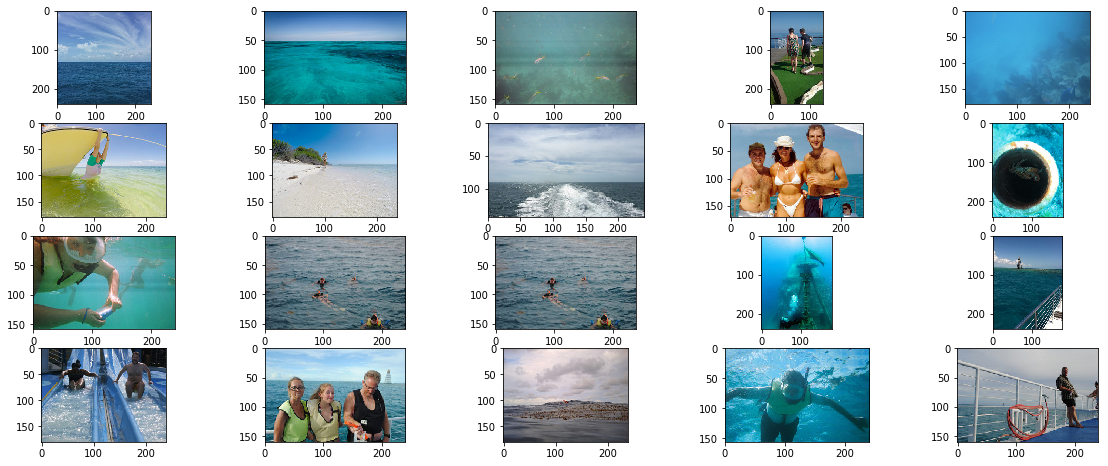

In [2]:
images = rnd.choices(url, k=20)

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    print (image)
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    f = io.imread(image)
    plt.imshow(f)